In [29]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot

In [3]:
dataset = loadtxt('xgb.txt', delimiter=',')

In [4]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [6]:
seed=7
test_size=0.33

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_pred = model.predict(X_test)

In [17]:
prediction = [round(value) for value in y_pred]

In [18]:
accuracy = accuracy_score(y_test, prediction)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 74.02%


# # 2

In [13]:
eval_set = [(X_test, y_test)]

In [20]:
model.fit(X_train, y_train, 
          early_stopping_rounds=10, 
          eval_metric='logloss',
         eval_set=eval_set,
         verbose=True)

[0]	validation_0-logloss:0.58321
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.50947
[2]	validation_0-logloss:0.46168
[3]	validation_0-logloss:0.43036
[4]	validation_0-logloss:0.40359
[5]	validation_0-logloss:0.38114
[6]	validation_0-logloss:0.36314
[7]	validation_0-logloss:0.35745
[8]	validation_0-logloss:0.34808
[9]	validation_0-logloss:0.34369
[10]	validation_0-logloss:0.33630
[11]	validation_0-logloss:0.33299
[12]	validation_0-logloss:0.33093
[13]	validation_0-logloss:0.32825
[14]	validation_0-logloss:0.32616
[15]	validation_0-logloss:0.32256
[16]	validation_0-logloss:0.31500
[17]	validation_0-logloss:0.31287
[18]	validation_0-logloss:0.30902
[19]	validation_0-logloss:0.30575
[20]	validation_0-logloss:0.30549
[21]	validation_0-logloss:0.30701
[22]	validation_0-logloss:0.30048
[23]	validation_0-logloss:0.29640
[24]	validation_0-logloss:0.29433
[25]	validation_0-logloss:0.29495
[26]	validation_0-logloss:0.29409
[27]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = model.predict(X_test)

In [25]:
prediction = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, prediction)
print('Accuracy %.2f%%' %( accuracy*100.0))

Accuracy 73.62%


In [26]:
print(model.feature_importances_)

[0.07536428 0.2485759  0.08882537 0.08890299 0.10708673 0.15929715
 0.09709622 0.13485137]


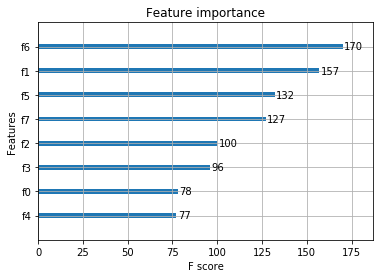

In [30]:
plot_importance(model)
pyplot.show()

In [31]:
n_estimators = [50, 100, 150, 200]#число деревьев
max_depth = [2,4,6,8]#максимальная глубина деревьев
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [33]:
param_grid

{'max_depth': [2, 4, 6, 8], 'n_estimators': [50, 100, 150, 200]}

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [36]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [37]:
grid_search = GridSearchCV(model, 
                           param_grid, 
                           scoring='neg_log_loss',
                           n_jobs=-1,
                          cv=kfold)

In [40]:
%%time
grid_result = grid_search.fit(X,Y)

Wall time: 778 ms


In [41]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_ ))

Best: -0.530152 using {'learning_rate': 0.01}


In [43]:
means = grid_result.cv_results_['mean_test_score']
stds  = grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, std, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,std,param))

-0.689563 (0.000760) with: {'learning_rate': 0.0001}
-0.660868 (0.006202) with: {'learning_rate': 0.001}
-0.530152 (0.034452) with: {'learning_rate': 0.01}
-0.552723 (0.117636) with: {'learning_rate': 0.1}
-0.653341 (0.171609) with: {'learning_rate': 0.2}
-0.718789 (0.176641) with: {'learning_rate': 0.3}
